In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

results = pd.read_csv('results.csv')
results.head()

,Unnamed: 0,index,f1,precision,recall,full_path,curve
0,0,mean,0.782470,0.782000,0.784092,./output/raw/depth_5/large_glushkova_eng/dict....,"[0.0, 0.7703984819734345, 0.959203036053131, 0..."
1,1,mean,0.772894,0.772429,0.774619,./output/raw/depth_5/small_glushkova_eng/dict....,"[0.0, 0.7552380952380953, 0.9447619047619048, ..."
2,2,mean,0.783497,0.782895,0.785492,./output/raw/depth_5/small_glushkova_eng/reran...,"[0.0, 0.7638095238095238, 0.9495238095238095, ..."
3,3,mean,0.875890,0.873924,0.879325,./output/raw/depth_5/medium_test_boun/dict.json,"[0.0, 0.8517034068136272, 0.9579158316633266, ..."
4,4,mean,0.878145,0.876863,0.880494,./output/raw/depth_5/medium_test_boun/reranked...,"[0.0, 0.8517034068136272, 0.9579158316633266, ..."


[None, None]

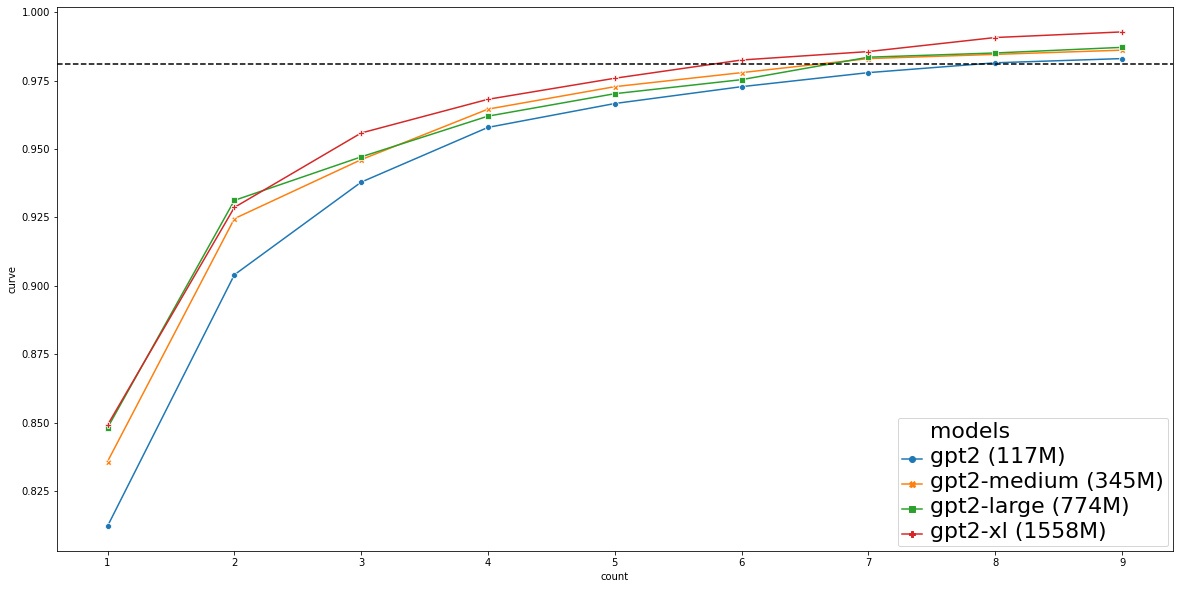

In [2]:
df = results[['full_path', 'curve']]
df = df[df['full_path'].str.contains('glushkova_rus')]
import ast
import matplotlib.pyplot as plt

df = df[df['full_path'].str.contains('13')]

df['curve'] = df['curve'].apply((ast.literal_eval))

df['curve'] = df['curve'].apply(lambda x: x[1:10])
df = df.explode('curve')
df['count'] = df.groupby('full_path').cumcount()

df['curve'] = df['curve'].astype(float)

def rename_full_path(path):
    replace_dict = {
        "small": "gpt2 (117M)",
        "medium": "gpt2-medium (345M)",
        "large": "gpt2-large (774M)",
        "xl": "gpt2-xl (1558M)"
    }
    for item in replace_dict.keys():
        if item in path:
            return replace_dict[item]

df['full_path'] = df['full_path'].apply(rename_full_path)

df = df.rename(columns={
    "full_path": "models"
})

from  matplotlib.ticker import FuncFormatter


plt.figure(figsize=(20,10))
ax = sns.lineplot(x='count', y='curve', hue='models', markers=True, style="models", dashes=False, data=df)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x+1)))

plt.xticks(np.arange(df['count'].min(), df['count'].max()+1, 1))
plt.axhline(0.9811, ls='--', c='black')

plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title

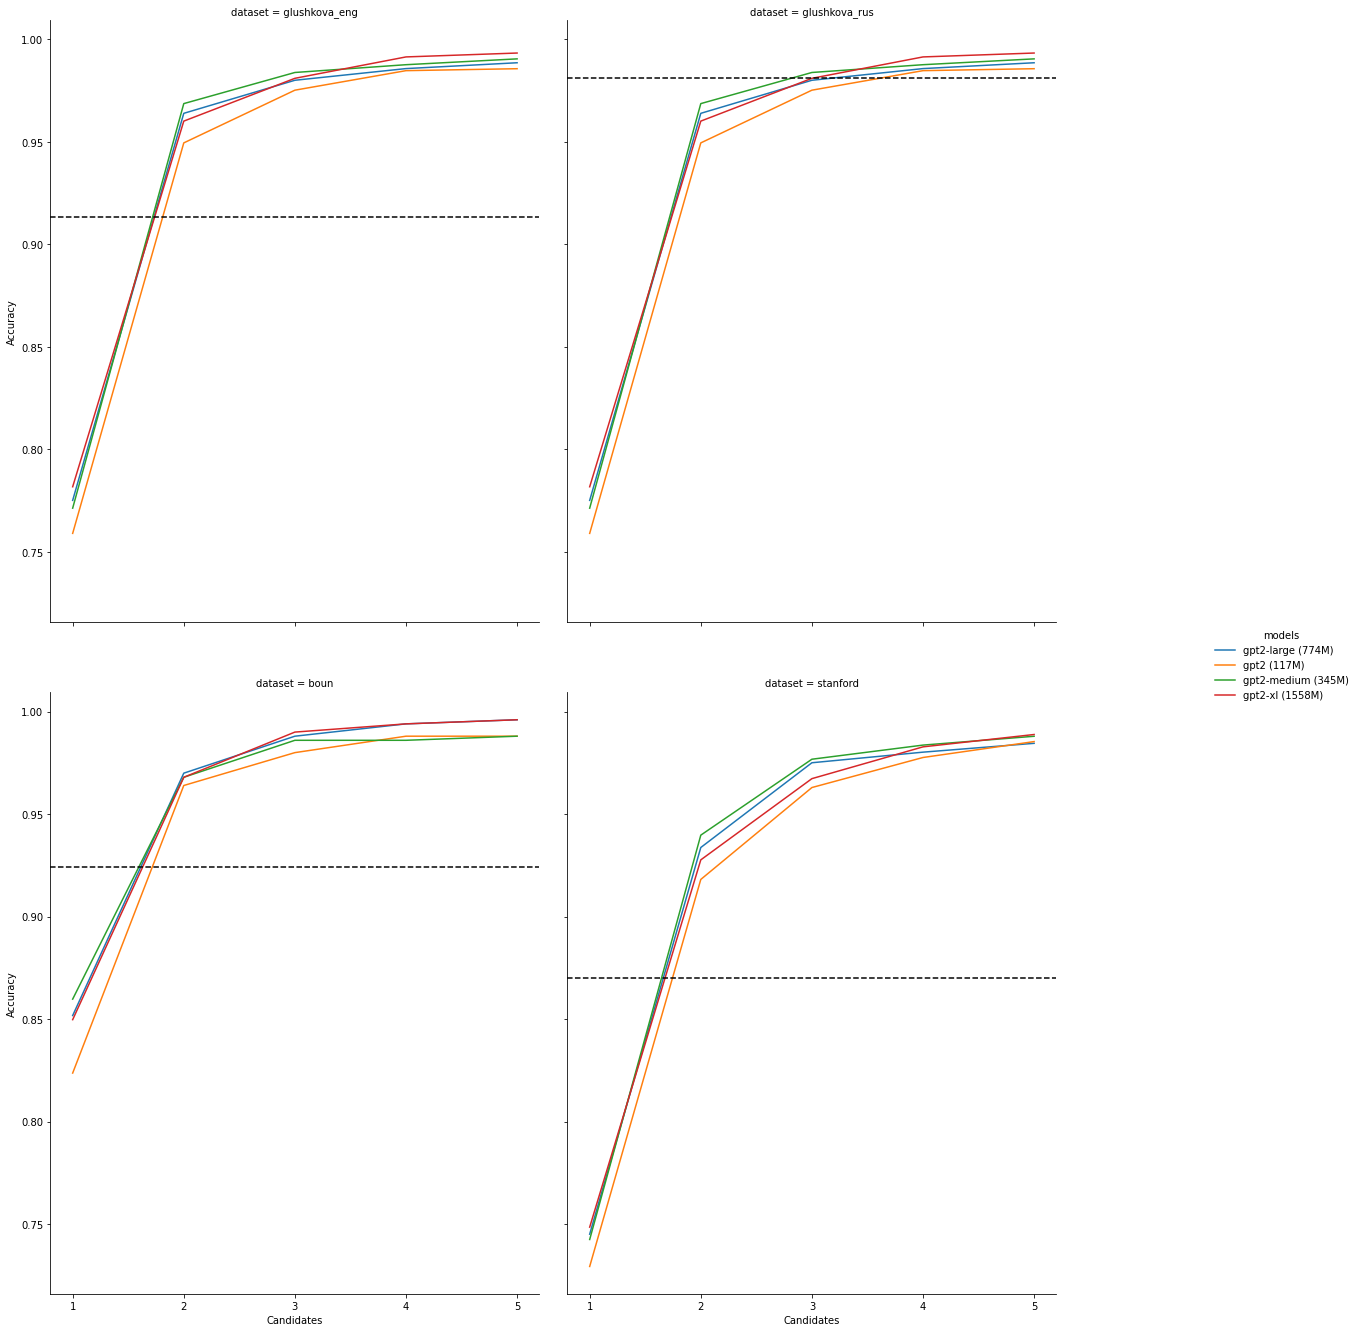

In [3]:
import ast
import matplotlib.pyplot as plt

#glushkova_eng

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 1.7,8.27

max_len_candidates = 6

df = results[['full_path', 'curve']]
df = df[df['full_path'].str.contains('glushkova_eng')]
df = df[df['full_path'].str.contains('13')]
df['curve'] = df['curve'].apply((ast.literal_eval))
df['curve'] = df['curve'].apply(lambda x: x[1:max_len_candidates])
df = df.explode('curve')
df['count'] = df.groupby('full_path').cumcount()
df['count'] = df['count'] + 1
df['curve'] = df['curve'].astype(float)

glushkova_eng = df.copy()
glushkova_eng['dataset'] = 'glushkova_eng'

#glushkova_rus

df = results[['full_path', 'curve']]
df = df[df['full_path'].str.contains('glushkova_eng')]
df = df[df['full_path'].str.contains('13')]
df['curve'] = df['curve'].apply((ast.literal_eval))
df['curve'] = df['curve'].apply(lambda x: x[1:max_len_candidates])
df = df.explode('curve')
df['count'] = df.groupby('full_path').cumcount()
df['count'] = df['count'] + 1
df['curve'] = df['curve'].astype(float)

glushkova_rus = df.copy()
glushkova_rus['dataset'] = 'glushkova_rus'

#boun

df = results[['full_path', 'curve']]
df = df[df['full_path'].str.contains('boun')]
df = df[~df['full_path'].str.contains('translation')]
df = df[~df['full_path'].str.contains('finetuning')]
df = df[~df['full_path'].str.contains('fine_tuning')]
df = df[df['full_path'].str.contains('13')]
df['curve'] = df['curve'].apply((ast.literal_eval))
df['curve'] = df['curve'].apply(lambda x: x[1:max_len_candidates])
df = df.explode('curve')
df['count'] = df.groupby('full_path').cumcount()
df['count'] = df['count'] + 1
df['curve'] = df['curve'].astype(float)

boun = df.copy()
boun['dataset'] = 'boun'

#stanford

df = results[['full_path', 'curve']]
df = df[df['full_path'].str.contains('stanford')]
df = df[~df['full_path'].str.contains('translation')]
df = df[~df['full_path'].str.contains('finetuning')]
df = df[~df['full_path'].str.contains('fine_tuning')]
df = df[df['full_path'].str.contains('13')]
df['curve'] = df['curve'].apply((ast.literal_eval))
df['curve'] = df['curve'].apply(lambda x: x[1:max_len_candidates])
df = df.explode('curve')
df['count'] = df.groupby('full_path').cumcount()
df['count'] = df['count'] + 1
df['curve'] = df['curve'].astype(float)

stanford = df.copy()
stanford['dataset'] = 'stanford'

df = pd.concat([glushkova_eng, glushkova_rus, boun, stanford])


def rename_full_path(path):
    replace_dict = {
        "small": "gpt2 (117M)",
        "medium": "gpt2-medium (345M)",
        "large": "gpt2-large (774M)",
        "xl": "gpt2-xl (1558M)"
    }
    for item in replace_dict.keys():
        if item in path:
            return replace_dict[item]

df['full_path'] = df['full_path'].apply(rename_full_path)

df = df.rename(columns={
    "full_path": "models",
    "curve": "Accuracy",
    "count": "Candidates"
})


# mask = ((df['models'] == "gpt2-medium (345M)") | (df['models'] == "gpt2-xl (1558M)"))
# df = df[mask]

g = sns.FacetGrid(df, hue="models", col="dataset", height=4, col_wrap=2)
g = (g.map(sns.lineplot, 'Candidates', 'Accuracy', dashes=False, markers=True).add_legend())
glushkova_eng_ax, glushkova_rus_ax, boun_ax, stanford_ax = g.axes
glushkova_eng_ax.axhline(0.9134, ls='--', c='black')
glushkova_rus_ax.axhline(0.9811, ls='--', c='black')
boun_ax.axhline(0.924, ls='--', c='black')
stanford_ax.axhline(0.87, ls='--', c='black')

g.fig.set_figheight(20)
g.fig.set_figwidth(20)

# for ax in g.axes.flat:
#     plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x+1)))

from  matplotlib.ticker import FuncFormatter


from matplotlib.ticker import MaxNLocator

for ax in g.axes.flatten():
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#     ax.set_xticklabels(ax.get_xticklabels(), fontsize=6)
#     ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x+1)))

    
g.savefig('test.png')
# plt.xticks(np.arange(df['count'].min(), df['count'].max()+1, 1))
# plt.axhline(0.9811, ls='--', c='black')

# plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title

[None, None]

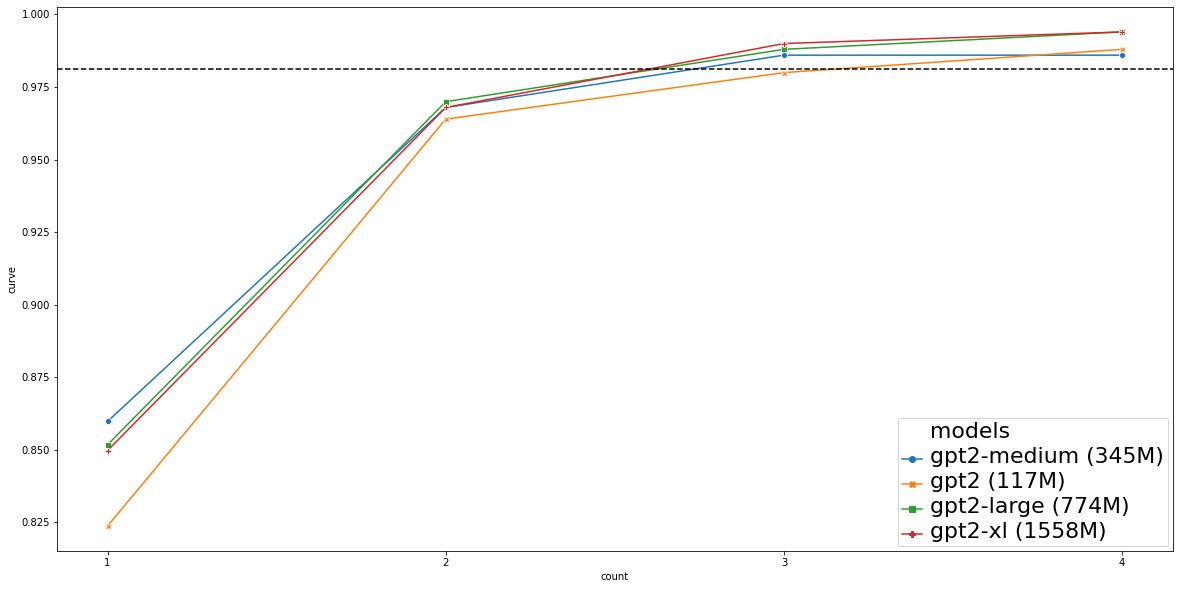

In [4]:
df = results[['full_path', 'curve']]
df = df[df['full_path'].str.contains('boun')]
df = df[~df['full_path'].str.contains('translation')]
df = df[~df['full_path'].str.contains('finetuning')]
df = df[~df['full_path'].str.contains('fine_tuning')]
df = df[df['full_path'].str.contains('13')]
df['curve'] = df['curve'].apply((ast.literal_eval))
df['curve'] = df['curve'].apply(lambda x: x[1:5])
df = df.explode('curve')
df['count'] = df.groupby('full_path').cumcount()
df['curve'] = df['curve'].astype(float)

boun_df = df



def rename_full_path(path):
    replace_dict = {
        "small": "gpt2 (117M)",
        "medium": "gpt2-medium (345M)",
        "large": "gpt2-large (774M)",
        "xl": "gpt2-xl (1558M)"
    }
    for item in replace_dict.keys():
        if item in path:
            return replace_dict[item]

df['full_path'] = df['full_path'].apply(rename_full_path)

df = df.rename(columns={
    "full_path": "models"
})

from  matplotlib.ticker import FuncFormatter


plt.figure(figsize=(20,10))
ax = sns.lineplot(x='count', y='curve', hue='models', markers=True, style="models", dashes=False, data=df)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x+1)))

plt.xticks(np.arange(df['count'].min(), df['count'].max()+1, 1))
plt.axhline(0.9811, ls='--', c='black')

plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title

[None, None]

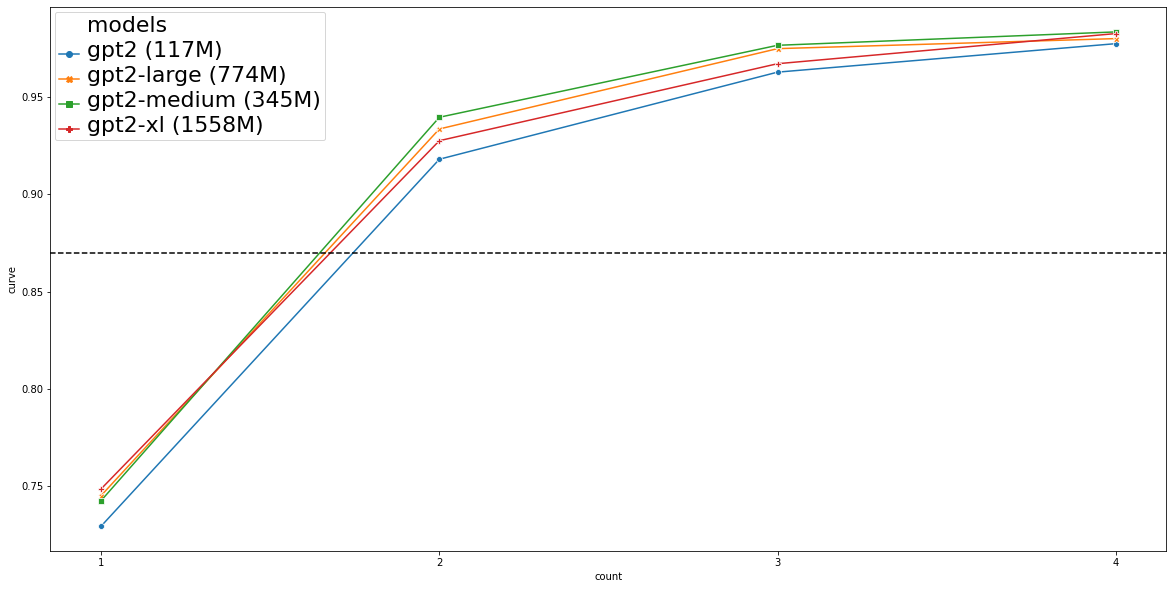

In [5]:
df = results[['full_path', 'curve']]
df = df[df['full_path'].str.contains('stanford')]
df = df[~df['full_path'].str.contains('translation')]
df = df[~df['full_path'].str.contains('finetuning')]
df = df[~df['full_path'].str.contains('fine_tuning')]
df = df[df['full_path'].str.contains('13')]
df['curve'] = df['curve'].apply((ast.literal_eval))
df['curve'] = df['curve'].apply(lambda x: x[1:5])
df = df.explode('curve')
df['count'] = df.groupby('full_path').cumcount()
df['curve'] = df['curve'].astype(float)

def rename_full_path(path):
    replace_dict = {
        "small": "gpt2 (117M)",
        "medium": "gpt2-medium (345M)",
        "large": "gpt2-large (774M)",
        "xl": "gpt2-xl (1558M)"
    }
    for item in replace_dict.keys():
        if item in path:
            return replace_dict[item]

df['full_path'] = df['full_path'].apply(rename_full_path)

df = df.rename(columns={
    "full_path": "models"
})

from  matplotlib.ticker import FuncFormatter


plt.figure(figsize=(20,10))
ax = sns.lineplot(x='count', y='curve', hue='models', markers=True, style="models", dashes=False, data=df)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x+1)))

plt.xticks(np.arange(df['count'].min(), df['count'].max()+1, 1))
plt.axhline(0.87, ls='--', c='black')

plt.setp(ax.get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='22') # for legend title

In [41]:
def parse_benchmarks(lst):
    new_lst = []
    for item in lst:
        new_lst.append(item.split(' ')[-1])
    return new_lst

df = pd.read_csv('speed.csv')
df['speed'] = df['speed'].apply((ast.literal_eval))
df['len'] = df['speed'].apply(lambda x: len(x))
df = df[df['len'] > 1]
df['speed'] = df['speed'].apply(parse_benchmarks)
df = df.explode('speed')
df['count'] = df.groupby('filename').cumcount()
df = df[df['filename'].str.contains('wiki')]
df['speed'] = 23919.0 / df['speed'].astype(float)
df = df.sort_values('speed', ascending=False).groupby('filename').head(1)
df['average_line_size'] = 13
df

,Unnamed: 0,filename,speed,len,count,average_line_size
5,5,gpt2_small&topk_1&steps_8&wiki.log,46.771824,11,0,13


In [42]:
df = pd.read_csv('speed.csv')
df['speed'] = df['speed'].apply((ast.literal_eval))
df['len'] = df['speed'].apply(lambda x: len(x))
df = df[df['len'] > 1]
df['speed'] = df['speed'].apply(parse_benchmarks)
df = df.explode('speed')
df['count'] = df.groupby('filename').cumcount()
df = df[df['filename'].str.contains('tweets')]
df['speed'] = 35350.0 / df['speed'].astype(float)
df = df.sort_values('speed', ascending=False).groupby('filename').head(1)
df['average_line_size'] = 40
df

,Unnamed: 0,filename,speed,len,count,average_line_size
59,59,gpt2_small&topk_1&steps_8&tweets.log,21.618118,11,7,40


In [43]:
df = pd.read_csv('speed.csv')
df['speed'] = df['speed'].apply((ast.literal_eval))
df['len'] = df['speed'].apply(lambda x: len(x))
df = df[df['len'] > 1]
df['speed'] = df['speed'].apply(parse_benchmarks)
df = df.explode('speed')
df['count'] = df.groupby('filename').cumcount()
df = df[df['filename'].str.contains('de_news')]
df = df[df['filename'].str.contains('16')]
df = df.sort_values('speed', ascending=False).groupby('filename').head(1)
df['speed'] = 130847.0 / df['speed'].astype(float)
df['average_line_size'] = 70
df

,Unnamed: 0,filename,speed,len,count,average_line_size
216,216,gpt2_large&topk_1&steps_16&de_news.log,2.661924,3,0,70
197,197,gpt2_medium&topk_1&steps_16&de_news.log,3.819895,5,0,70
208,208,gpt2_small&topk_1&steps_16&de_news.log,5.980393,11,1,70


In [86]:
df = pd.read_csv('count.csv')
df['lines'] = df['lines'].apply(ast.literal_eval)
df['lines'] = df['lines'].apply(lambda x: [y for y in x if int(y) > 1])

allowed = [
    "de_news.tsv",
    "tweets.tsv",
    "wiki.tsv"
]

allowed = pd.DataFrame(allowed)

df = pd.merge(allowed, df, left_on=0, right_on='filename', how='inner')

df = df[['filename', 'lines']]
df = df.explode('lines')
df['lines'] = df['lines'].astype(int)
df['count'] = df.groupby('filename').cumcount()
df

,filename,lines,count
0,de_news.tsv,99,0
0,de_news.tsv,106,1
0,de_news.tsv,169,2
0,de_news.tsv,70,3
0,de_news.tsv,266,4
...,...,...,...
2,wiki.tsv,25,995
2,wiki.tsv,26,996
2,wiki.tsv,26,997
2,wiki.tsv,24,998


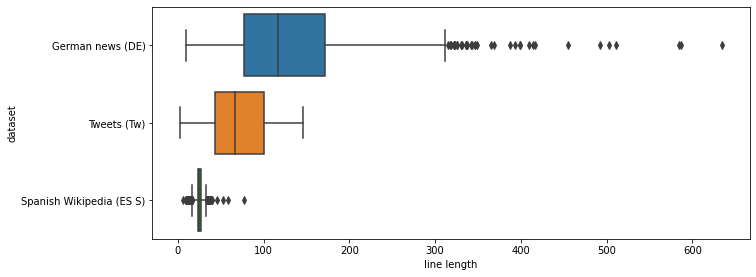

In [87]:
rcParams['figure.figsize'] = 10.7,4.27

def rename_rows(record):
    dictionary = {
        "de_news.tsv": "German news (DE)",
        "tweets.tsv": "Tweets (Tw)",
        "wiki.tsv": "Spanish Wikipedia (ES S)"
    }
    return dictionary[record]

df['filename'] = df['filename'].apply(rename_rows)

plot = df.rename(columns={
    "filename": "dataset",
    "lines": "line length"
})

sns.boxplot(y='dataset', x='line length', data=plot)
